In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import re

**Inspection**

In [ ]:
df_messy = pd.read_csv('olxdatahouse3.csv')

In [ ]:
df_messy.head()

,judul,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,price
0,Rumah ready harga dibawah pasar di Golden City...,Bekasi Utara,60,57,3,3,Rp 851.000.000
1,Jual Rumah dekat Sekolah Nego sampai jadi,Bekasi Barat,104,104,3,2,Rp 700.000.000
2,Jual Rumah mewah yg murah meriah,Bekasi Utara,88,88,2,2,Rp 430.000.000
3,DI JUAL RUMAH MURAH DI PERUMAHAN TELAGA MAS,Bekasi Utara,72,50,3,1,Rp 375.000.000
4,DIJUAL RUMAH MASUK KOTA BEKASI DI BEKASI TIMUR...,Bekasi Timur,60,50,2,1,Rp 400.000.009


In [ ]:
df_messy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   judul               12000 non-null  object
 1   kecamatan           12000 non-null  object
 2   luas tanah (m2)     12000 non-null  int64 
 3   luas bangunan (m2)  12000 non-null  int64 
 4   kamar tidur         12000 non-null  object
 5   kamar mandi         12000 non-null  object
 6   price               12000 non-null  object
dtypes: int64(2), object(5)
memory usage: 656.4+ KB


In [ ]:
df_messy['kecamatan'].value_counts()

Jatiasih          1766
Bekasi Utara      1696
Bekasi Barat      1291
Pondok Gede       1215
Bekasi Selatan     922
Tambun Selatan     683
Medan Satria       602
Mustika Jaya       586
Bekasi Timur       521
Cipayung           482
Rawalumbu          475
Cileungsi          408
Jati Sampurna      302
Pondok Melati      299
Bantar Gebang      281
Duren Sawit        253
Cakung             186
Makasar             27
Setu                 2
Tambun Utara         1
Gunung Putri         1
Tapos                1
Name: kecamatan, dtype: int64

Terdapat lokasi diluar kecamatan yang ada di bekasi. Lokasi yang berada di luar bekasi akan dihilangkan

In [ ]:
df_messy.isnull().sum()

judul                 0
kecamatan             0
luas tanah (m2)       0
luas bangunan (m2)    0
kamar tidur           0
kamar mandi           0
price                 0
dtype: int64

Tidak ada data yang kosong (null)

In [ ]:
df_messy.duplicated().sum()

4103

Terdapat 4103 data yang sama (duplikat), data ini akan dihilangkan

**Data Cleansing**

In [ ]:
df = df_messy.copy()
df.head()

,judul,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,price
0,Rumah ready harga dibawah pasar di Golden City...,Bekasi Utara,60,57,3,3,Rp 851.000.000
1,Jual Rumah dekat Sekolah Nego sampai jadi,Bekasi Barat,104,104,3,2,Rp 700.000.000
2,Jual Rumah mewah yg murah meriah,Bekasi Utara,88,88,2,2,Rp 430.000.000
3,DI JUAL RUMAH MURAH DI PERUMAHAN TELAGA MAS,Bekasi Utara,72,50,3,1,Rp 375.000.000
4,DIJUAL RUMAH MASUK KOTA BEKASI DI BEKASI TIMUR...,Bekasi Timur,60,50,2,1,Rp 400.000.009


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

Sekarang sudah tidak ada data yang duplikat, selanjutnya kita hilangkan data dengan lokasi di luar bekasi

In [ ]:
list_kec = [
            'Bantar Gebang',
            'Bekasi Barat',
            'Bekasi Selatan',
            'Bekasi Timur',
            'Bekasi Utara',
            'Jatiasih',
            'Jati Sampurna',
            'Medan Satria',
            'Mustika Jaya',
            'Pondok Gede',
            'Pondok Melati',
            'Rawalumbu'
]

In [ ]:
df = df[df['kecamatan'].isin(list_kec)]

In [ ]:
df['kecamatan'].value_counts()

Jatiasih          1143
Bekasi Utara       999
Bekasi Barat       664
Pondok Gede        658
Bekasi Selatan     524
Mustika Jaya       508
Medan Satria       370
Bekasi Timur       350
Rawalumbu          309
Jati Sampurna      293
Bantar Gebang      210
Pondok Melati      204
Name: kecamatan, dtype: int64

Sekarang lokasi sudah menjadi semua kecamatan yang ada di bekasi

In [ ]:
df.shape

(6232, 7)

**Data Transformation**

Data transformasi dibutuhkan mengingat datanya belum rapih. Beberapa penyesuain akan dilakukan sehingga mendapatkan data tabel yang sesuai

In [ ]:
df.drop(['judul'], axis=1, inplace=True)

In [ ]:
df.reset_index(drop = True, inplace=True)

In [ ]:
df.rename(columns={"price": "harga (Rp)"}, inplace=True)

In [ ]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return "".join(num)

df['harga (Rp)']=df['harga (Rp)'].apply(lambda x: find_number(x))
df['kamar tidur']=df['kamar tidur'].apply(lambda x: find_number(x))
df['kamar mandi']=df['kamar mandi'].apply(lambda x: find_number(x))

In [ ]:
df

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
0,Bekasi Utara,60,57,3,3,851000000
1,Bekasi Barat,104,104,3,2,700000000
2,Bekasi Utara,88,88,2,2,430000000
3,Bekasi Utara,72,50,3,1,375000000
4,Bekasi Timur,60,50,2,1,400000009
...,...,...,...,...,...,...
6227,Pondok Gede,65,45,2,1,250000000
6228,Pondok Gede,225,230,5,4,2050000000
6229,Pondok Gede,140,170,5,3,1900000000
6230,Jatiasih,134,108,4,3,1300000000


mengingat tipe data belum sesuai, dilakukan penyesuaian berupa merubah tipe yang seharusnya angka menjadi angka (int)

In [ ]:
df = df.astype({
    "kamar tidur": int,
    "kamar mandi": int,
    "harga (Rp)": int
                })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6232 entries, 0 to 6231
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kecamatan           6232 non-null   object
 1   luas tanah (m2)     6232 non-null   int64 
 2   luas bangunan (m2)  6232 non-null   int64 
 3   kamar tidur         6232 non-null   int64 
 4   kamar mandi         6232 non-null   int64 
 5   harga (Rp)          6232 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 292.2+ KB


Sekarang data sudah sesuai tipenya

In [ ]:
df.to_csv('dfnew1.csv') #data frame by kecamatan

**Outlier before inspection V2**

Selanjutnya kita inspeksi outlier, sebelumnya kita drop dulu kolom kecamatan sehingga datanya umum se-bekasi

In [ ]:
for column in df.drop(columns="kecamatan").columns:
  out1 = df[column].quantile(0.25) #q1
  out2 = df[column].quantile(0.5) #median
  out3 = df[column].quantile(0.75) #q2
  out4 = out3-out1
  # Minor outlier detection
  out4a = out4*1.5
  out5a,out5b = out1+out4a,out3+out4a
  # Mayor outlier detection
  out4b = out4*3
  out6a,out6b = out1+out4b,out3+out4b
  print("Jumlah outlier " + column + " = {} \n".format(df[df[column]>=out5b].shape[0]))

Jumlah outlier luas tanah (m2) = 561 

Jumlah outlier luas bangunan (m2) = 487 

Jumlah outlier kamar tidur = 143 

Jumlah outlier kamar mandi = 665 

Jumlah outlier harga (Rp) = 480 



In [ ]:
# out1 = df['harga (Rp)'].quantile(0.25) #q1
# out2 = df['harga (Rp)'].quantile(0.5) #median
# out3 = df['harga (Rp)'].quantile(0.75) #q2
# out4 = out3-out1
#   # Minor outlier detection
# out4a = out4*1.5
# out5a,out5b = out1+out4a,out3+out4a

In [ ]:
# out3

1350000000.0

In [ ]:
# df[(df['harga (Rp)'] >= out5b)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
67,Bekasi Utara,297,180,4,4,5352600000
78,Bekasi Timur,685,200,3,3,3500000000
84,Bekasi Utara,180,196,5,4,3250000000
91,Bekasi Barat,200,360,5,5,3800000000
168,Bekasi Barat,181,250,5,4,3500000000
...,...,...,...,...,...,...
6218,Pondok Melati,120,148,4,4,2700000000
6220,Pondok Gede,2000,1000,10,7,20000000000
6222,Jatiasih,700,1400,8,9,6500000000
6224,Pondok Gede,541,246,4,3,5000000000


In [ ]:
# df.drop(df[(df['harga (Rp)'] >= out5b)].index, inplace=True)
# df.shape

(5752, 6)

In [ ]:
# df.drop(df[df['luas tanah (m2)'] >= 4000].index, inplace=True)
# df.shape

(5751, 6)

In [ ]:
# df.to_csv('df1_nooutlier.csv') #checkpoint data frame

In [ ]:
df.describe()

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
count,6232.000000,6232.000000,6232.000000,6232.000000,6.232000e+03
mean,128.513479,114.617458,2.986361,2.031451,1.217230e+09
std,225.192638,144.272725,1.322244,1.290176,1.835125e+09
min,1.000000,0.000000,1.000000,1.000000,3.000000e+07
25%,63.000000,50.000000,2.000000,1.000000,4.800000e+08
50%,85.000000,80.000000,3.000000,2.000000,7.750000e+08
75%,127.000000,130.000000,4.000000,2.000000,1.350000e+09
max,8000.000000,5000.000000,10.000000,10.000000,6.000000e+10


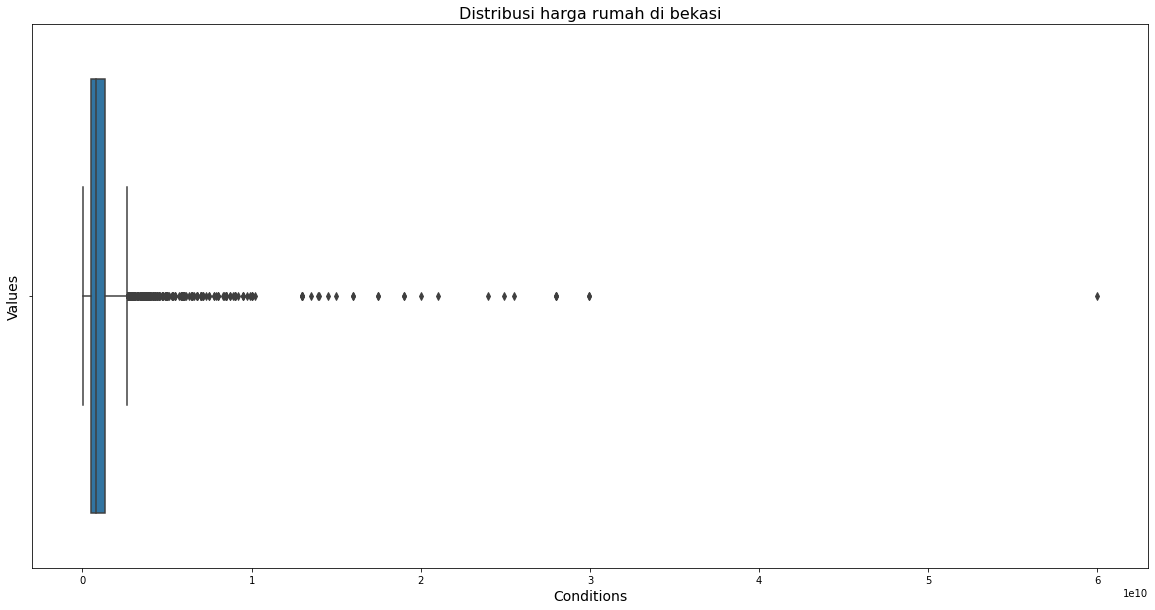

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot = sns.boxplot(x="harga (Rp)", data=df)
boxplot.axes.set_title("Distribusi harga rumah di bekasi", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

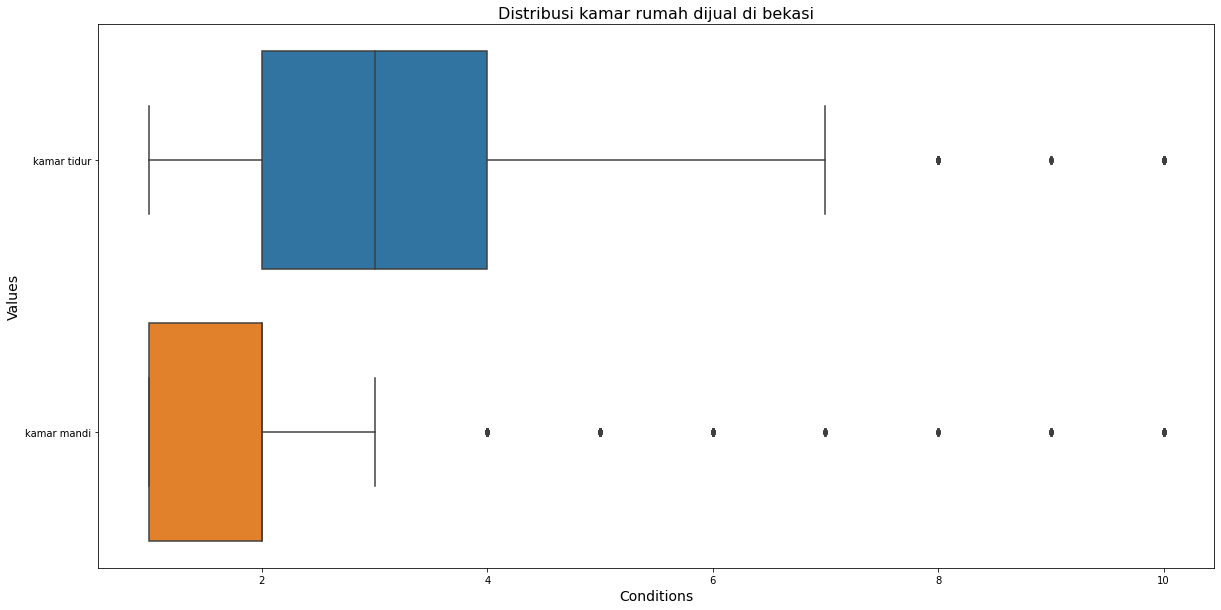

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot2 = sns.boxplot(y="variable", x='value', data=pd.melt(df.drop(columns=['kecamatan','harga (Rp)','luas bangunan (m2)', 'luas tanah (m2)'])))
boxplot2.axes.set_title("Distribusi kamar rumah dijual di bekasi", fontsize=16)
boxplot2.set_xlabel("Conditions", fontsize=14)
boxplot2.set_ylabel("Values", fontsize=14)
plt.show()

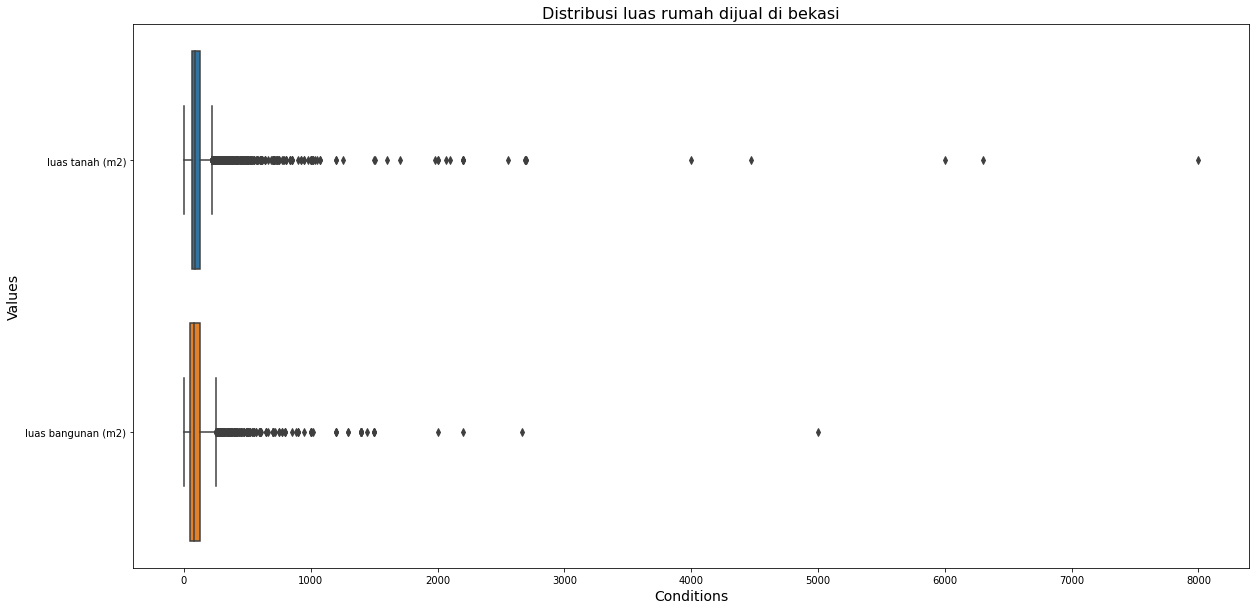

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot3 = sns.boxplot(y="variable", x='value', data=pd.melt(df.drop(columns=['kecamatan','harga (Rp)','kamar tidur', 'kamar mandi'])))
boxplot3.axes.set_title("Distribusi luas rumah dijual di bekasi", fontsize=16)
boxplot3.set_xlabel("Conditions", fontsize=14)
boxplot3.set_ylabel("Values", fontsize=14)
plt.show()

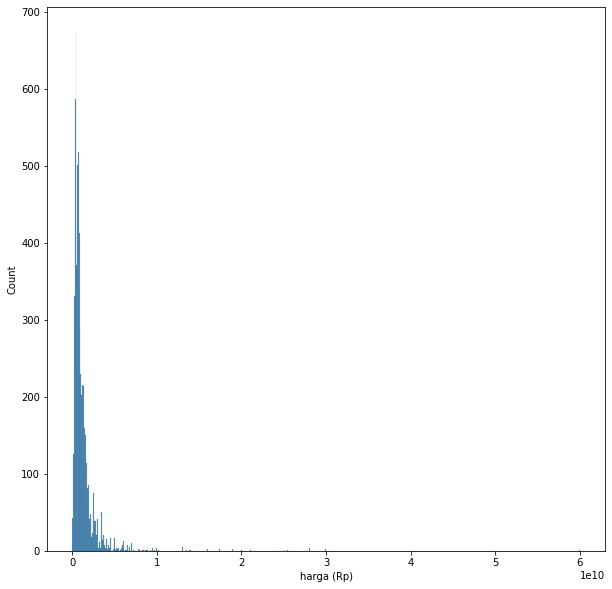

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=False)

ax = sns.histplot(x="harga (Rp)", data=df.sort_values('harga (Rp)', ascending=False))



outlier yang cukup banyak, sehingga perlu inspeksi lebih untuk datanya

**Inspection V2.**



*   inspeksi luas tanah (m2)
*   inspeksi luas bangunan (m2)
*   inspeksi harga




In [ ]:
df.describe()

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
count,6232.000000,6232.000000,6232.000000,6232.000000,6.232000e+03
mean,128.513479,114.617458,2.986361,2.031451,1.217230e+09
std,225.192638,144.272725,1.322244,1.290176,1.835125e+09
min,1.000000,0.000000,1.000000,1.000000,3.000000e+07
25%,63.000000,50.000000,2.000000,1.000000,4.800000e+08
50%,85.000000,80.000000,3.000000,2.000000,7.750000e+08
75%,127.000000,130.000000,4.000000,2.000000,1.350000e+09
max,8000.000000,5000.000000,10.000000,10.000000,6.000000e+10


terdapat keanehan, yaitu luas terendah dan tertinggi. Kita akan hilangkan baris dengan luas yang aneh misal 0 m2, baik luas tanah dan bangunan

In [ ]:
df[df['luas tanah (m2)'] <= 10]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
449,Bekasi Utara,1,1,1,1,200000000
1016,Bekasi Selatan,1,2,2,1,250000004
2583,Jatiasih,2,36,1,1,234000000
3125,Jatiasih,7,90,3,2,775000000
4325,Jati Sampurna,10,100,5,4,1700000000
4389,Mustika Jaya,6,36,2,1,239000000
4755,Mustika Jaya,1,42,3,2,420000000
5523,Jatiasih,1,90,3,2,770000000
5653,Jatiasih,4,60,3,2,630000000
5732,Jatiasih,4,90,3,2,775000000


In [ ]:
df[(df['luas tanah (m2)'] > 10) & (df['luas tanah (m2)'] <= 20)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
595,Bekasi Barat,13,4,2,2,1500000000


In [ ]:
df[(df['luas tanah (m2)'] > 20) & (df['luas tanah (m2)'] <= 30)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
163,Bekasi Utara,30,24,1,1,185000000
417,Bekasi Utara,30,24,1,1,185000000
429,Bekasi Utara,30,24,1,1,185000000
1182,Bekasi Utara,30,24,1,1,185000000
1315,Bekasi Utara,30,30,1,1,115000000
1320,Bekasi Utara,30,24,1,1,185000000
1327,Bekasi Utara,30,24,1,1,185000000
1332,Bekasi Utara,30,24,1,1,185000000
1333,Bekasi Utara,30,24,1,1,185000000
2277,Pondok Gede,30,60,2,2,400000000


luas tanah < 20 m2 akan dihilangkan karena agak aneh

In [ ]:
df.drop(df[df['luas tanah (m2)'] <= 20].index, inplace=True)
df.shape

(6221, 6)

In [ ]:
df[(df['luas tanah (m2)'] >= 4000)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
1171,Bekasi Selatan,4475,2200,1,1,28000000000
2943,Jatiasih,6002,48,2,2,765000000
3024,Pondok Gede,6300,5000,10,10,60000000000
4148,Jati Sampurna,8000,300,4,5,13900000000
4860,Rawalumbu,4000,300,6,3,7000000000


luas tanah > 4000 m2 juga akan kita hilangkan saja

In [ ]:
df.drop(df[df['luas tanah (m2)'] >= 4000].index, inplace=True)
df.shape

(6180, 6)

Lanjut ke luas bangunan

In [ ]:
df[df['luas bangunan (m2)'] <= 10]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)


In [ ]:
df[(df['luas bangunan (m2)'] > 10) & (df['luas bangunan (m2)'] <= 20)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
3338,Pondok Gede,24,20,1,1,220000000
3846,Bekasi Utara,65,18,2,1,250000000


In [ ]:
df.drop(df[df['luas bangunan (m2)'] <= 10].index, inplace=True)
df.shape

(6180, 6)

In [ ]:
df[(df['luas bangunan (m2)'] >= 4000)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)


Selanjutnya inspeksi harga yang mengandung kejanggalan/aneh ataupun dapat menyebabkan outlier

In [ ]:
df.describe()

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
count,6180.000000,6180.000000,6180.000000,6180.000000,6.180000e+03
mean,123.686246,114.213107,2.994175,2.034142,1.190116e+09
std,153.018591,127.778070,1.316655,1.288074,1.598526e+09
min,24.000000,18.000000,1.000000,1.000000,3.000000e+07
25%,63.000000,50.000000,2.000000,1.000000,4.800000e+08
50%,85.000000,80.000000,3.000000,2.000000,7.750000e+08
75%,126.000000,130.000000,4.000000,2.250000,1.350000e+09
max,2700.000000,2663.000000,10.000000,10.000000,2.995000e+10


In [ ]:
df[(df['harga (Rp)'] >= 10000000000)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
173,Bekasi Timur,807,600,8,8,14500000000
651,Bekasi Barat,838,520,7,3,13000000000
1089,Bekasi Utara,786,1000,8,7,17500000000
1095,Bekasi Utara,290,470,7,6,19000000000
1131,Bekasi Utara,290,470,7,6,19000000000
1136,Pondok Gede,2693,312,9,6,29950000000
1190,Bekasi Selatan,577,750,10,9,10000000000
1239,Medan Satria,148,246,6,4,10000000000
1572,Bekasi Utara,449,568,6,6,13500000000
1805,Bekasi Utara,713,280,7,6,13000000000


In [ ]:
df.drop(df[df['harga (Rp)'] >= 10000000000].index, inplace=True)
df.shape

(6152, 6)

In [ ]:
df[df['harga (Rp)'] <= 150000000]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
6,Medan Satria,55,22,1,1,80000000
38,Bekasi Utara,35,35,1,1,140000000
46,Bekasi Timur,60,30,2,1,85000000
102,Bekasi Utara,35,35,1,1,120000000
120,Bekasi Timur,72,36,2,1,100000000
...,...,...,...,...,...,...
6159,Pondok Melati,60,30,1,1,30000000
6160,Jatiasih,60,30,1,1,30000000
6194,Pondok Gede,100,48,1,1,134400000
6195,Pondok Melati,100,52,1,1,145600000


In [ ]:
df.drop(df[df['harga (Rp)'] <= 150000000].index, inplace=True)
df.shape

(6089, 6)

In [ ]:
df.describe()

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
count,6089.000000,6089.000000,6089.000000,6089.000000,6.089000e+03
mean,119.401872,111.755296,2.986533,2.023485,1.127644e+09
std,124.079535,114.650561,1.278736,1.257020,1.101809e+09
min,24.000000,18.000000,1.000000,1.000000,1.550000e+08
25%,64.000000,50.000000,2.000000,1.000000,4.880000e+08
50%,85.000000,80.000000,3.000000,2.000000,7.800000e+08
75%,126.000000,130.000000,4.000000,2.000000,1.350000e+09
max,2200.000000,1500.000000,10.000000,10.000000,9.700000e+09


In [ ]:
df[(df['luas bangunan (m2)'] <= 50) & (df['kamar mandi'] >= 5)]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
77,Medan Satria,72,42,2,10,750000000


In [ ]:
# df.drop(df[(df['luas bangunan (m2)'] <= 50) & (df['kamar mandi'] >= 5)].index, inplace=True)
# df.shape

(6088, 6)

In [ ]:
df[(df['kamar tidur'] < df['kamar mandi'] )]

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
97,Bekasi Barat,72,90,2,3,750000570
113,Bekasi Utara,60,45,1,2,450000000
153,Bekasi Utara,126,119,3,4,2000000000
272,Medan Satria,200,350,6,7,4200000000
323,Bekasi Timur,66,93,2,3,650000000
...,...,...,...,...,...,...
6056,Pondok Gede,144,144,3,4,1000000000
6094,Jatiasih,700,1400,8,9,6800000000
6098,Jatiasih,700,1400,8,9,6800000000
6182,Pondok Gede,216,175,4,6,2500000000


In [ ]:
# df.drop(df[(df['kamar tidur'] < df['kamar mandi'] )].index, inplace=True)
# df.shape

(6025, 6)

In [ ]:
# df.drop(df[df['kamar mandi'] > 6].index, inplace=True)
# df.shape

(6023, 6)

In [ ]:
# df.drop(df[df['kamar tidur'] >= 5].index, inplace=True)
# df.shape

In [ ]:
# df.drop(df[df['kamar mandi'] >= 5].index, inplace=True)
# df.shape

**Outlier after inspection V2**

In [ ]:
for column in df.drop(columns="kecamatan").columns:
  out1 = df[column].quantile(0.25) #q1
  out2 = df[column].quantile(0.5) #median
  out3 = df[column].quantile(0.75) #q2
  out4 = out3-out1
  # Minor outlier detection
  out4a = out4*1.5
  out5a,out5b = out1+out4a,out3+out4a
  # Mayor outlier detection
  out4b = out4*3
  out6a,out6b = out1+out4b,out3+out4b
  print("Jumlah outlier " + column + " = {} \n".format(df[df[column]>=out5b].shape[0]))

Jumlah outlier luas tanah (m2) = 545 

Jumlah outlier luas bangunan (m2) = 456 

Jumlah outlier kamar tidur = 123 

Jumlah outlier kamar mandi = 635 

Jumlah outlier harga (Rp) = 445 



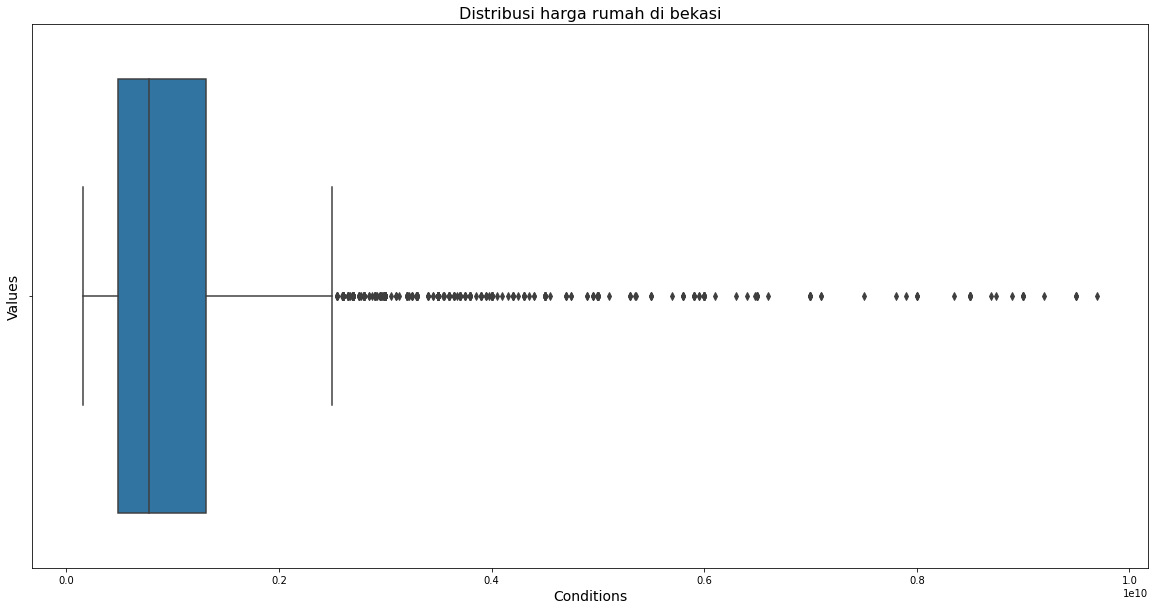

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot = sns.boxplot(x="harga (Rp)", data=df)
boxplot.axes.set_title("Distribusi harga rumah di bekasi", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

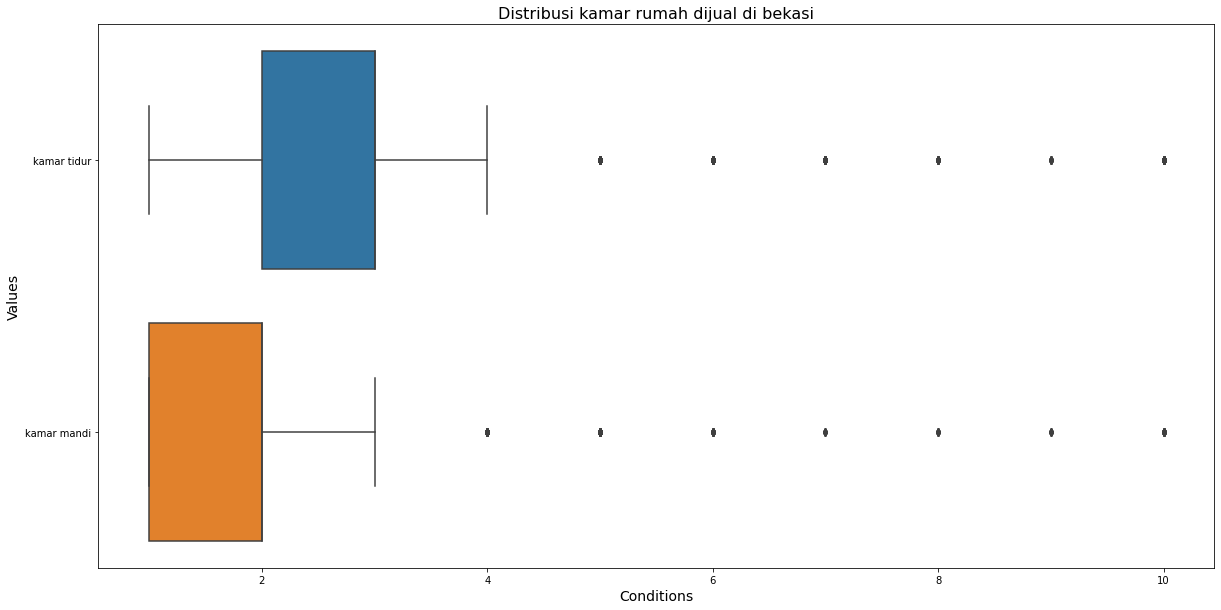

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot2 = sns.boxplot(y="variable", x='value', data=pd.melt(df.drop(columns=['kecamatan','harga (Rp)','luas bangunan (m2)', 'luas tanah (m2)'])))
boxplot2.axes.set_title("Distribusi kamar rumah dijual di bekasi", fontsize=16)
boxplot2.set_xlabel("Conditions", fontsize=14)
boxplot2.set_ylabel("Values", fontsize=14)
plt.show()

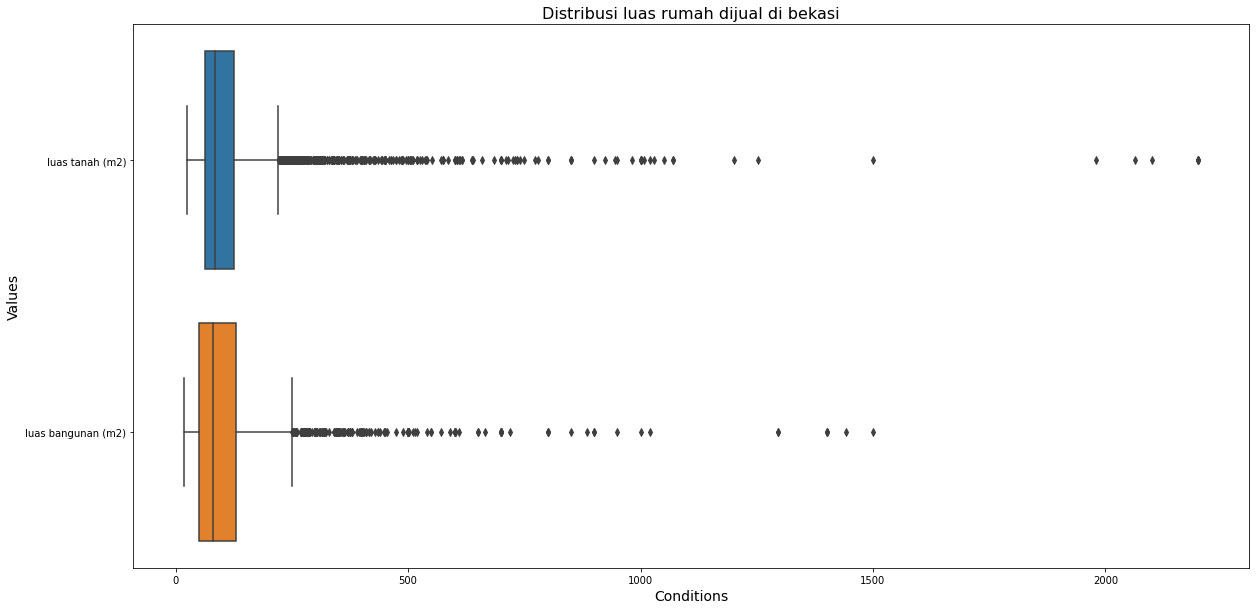

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot3 = sns.boxplot(y="variable", x='value', data=pd.melt(df.drop(columns=['kecamatan','harga (Rp)','kamar tidur', 'kamar mandi'])))
boxplot3.axes.set_title("Distribusi luas rumah dijual di bekasi", fontsize=16)
boxplot3.set_xlabel("Conditions", fontsize=14)
boxplot3.set_ylabel("Values", fontsize=14)
plt.show()

Terlihat setelah inspeksi V2 data outlier justru bertambah, tapi kali ini penulis memilih membiarkan outlier ke-2 ini karena menganggap datanya lebih masuk akal dibanding sebelumnya.

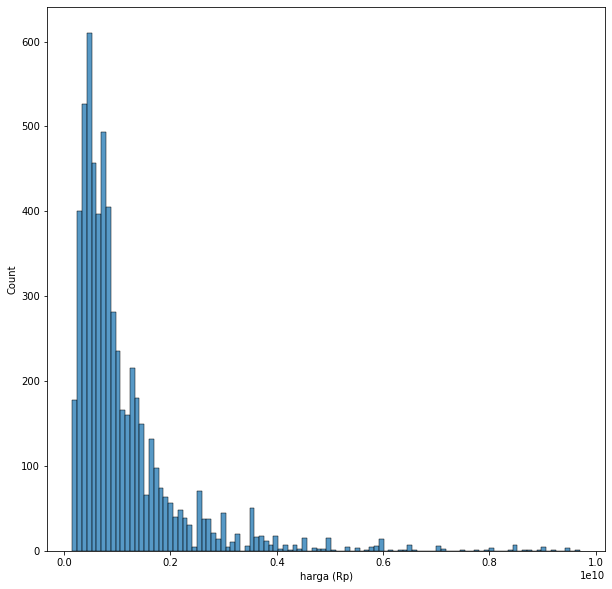

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=False)

ax = sns.histplot(x="harga (Rp)", data=df.sort_values('harga (Rp)', ascending=False))


<function matplotlib.pyplot.show>

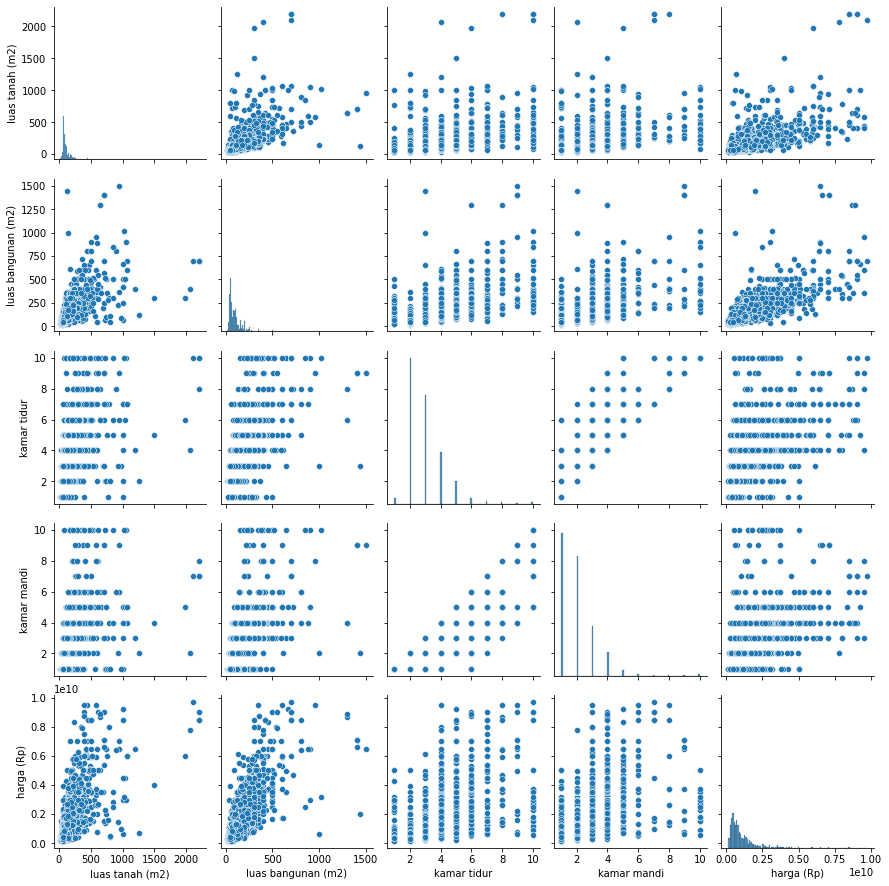

In [ ]:

sns.pairplot(df)
plt.show

In [ ]:
df.corr()

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
luas tanah (m2),1.000000,0.672046,0.553479,0.519384,0.706721
luas bangunan (m2),0.672046,1.000000,0.723199,0.702843,0.778867
kamar tidur,0.553479,0.723199,1.000000,0.852141,0.666049
kamar mandi,0.519384,0.702843,0.852141,1.000000,0.666017
harga (Rp),0.706721,0.778867,0.666049,0.666017,1.000000


In [ ]:
df.to_csv('dfnew_cek2.csv') #checkpoint data frame